Multinomial Naive Bayes Confusion matrix
[[ 22   2   3   6  12]
 [  1   7   1   3  13]
 [  3   1  18   4  26]
 [  2   0   1  57  76]
 [  3   3   4  28 718]]

Multinomial Naive Bayes Classification Report
              precision    recall  f1-score   support

           1       0.71      0.49      0.58        45
           2       0.54      0.28      0.37        25
           3       0.67      0.35      0.46        52
           4       0.58      0.42      0.49       136
           5       0.85      0.95      0.90       756

    accuracy                           0.81      1014
   macro avg       0.67      0.50      0.56      1014
weighted avg       0.79      0.81      0.79      1014


Multinomial Naive Bayes accuracy_score:  0.8106508875739645

Logistic Regression Confusion matrix
[[  3   0   0   2  40]
 [  0   0   0   4  21]
 [  0   0   3   4  45]
 [  0   0   0  17 119]
 [  1   0   0   9 746]]

Logistic Regression Classification Report
              precision    recall  f1-score   sup

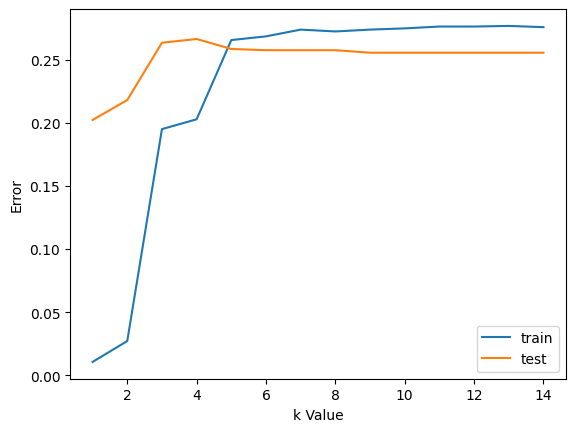

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import re, csv, nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics
import matplotlib.pyplot as plt

data = pd.read_csv("amazon_alexa_data.csv")
#Removing handle null values
data.dropna(inplace=True)
#Tokenizing words
tokenizer = RegexpTokenizer("[a-zA-Z'`éèî]+")
for x in data['verified_reviews']:
     x = tokenizer.tokenize(x)
#Converting words to lower case
data['verified_reviews'] = data['verified_reviews'].str.lower()
#Removing punctuations
data['verified_reviews'] = data['verified_reviews'].str.translate(str.maketrans('', '', string.punctuation))
#Removing stop words
stop_words = set(stopwords.words('english'))
data['verified_reviews'] = data['verified_reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
#Stemming or Lemmatizing the words
lmtzr = WordNetLemmatizer()
for word in data['verified_reviews']:
    word = lmtzr.lemmatize(word)

#Tfid Vectorizer
# Transform features
vectorizer = TfidfVectorizer()
X = data.verified_reviews
X_tfidf = vectorizer.fit_transform(X)

# create target
y = data.rating

# split the dataset for training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.33, random_state=42
)

#Multinomial Naive Bayes Classification
# Training classifier model 
clf = SGDClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
#Computing Confusion matrix
print("Multinomial Naive Bayes Confusion matrix")
print(metrics.confusion_matrix(y_test, y_pred))
print()
#Classification Report
print("Multinomial Naive Bayes Classification Report")
print(classification_report(y_test, y_pred, labels=np.unique(y_pred)))
accuracy_score = metrics.accuracy_score(y_test,y_pred)
print()
print("Multinomial Naive Bayes accuracy_score: ",accuracy_score)

#Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print()
#Computing Confusion matrix
print("Logistic Regression Confusion matrix")
print(metrics.confusion_matrix(y_test, y_pred))
print()
#Classification Report
print("Logistic Regression Classification Report")
print(classification_report(y_test, y_pred, labels=np.unique(y_pred)))
accuracy_score = metrics.accuracy_score(y_test,y_pred)
print()
print("Logistic Regression accuracy_score: ",accuracy_score)


#KNN Classfication
#Finding k-value
error1= []
error2= []
for k in range(1,15):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred1= knn.predict(X_train)
    error1.append(np.mean(y_train!= y_pred1))
    y_pred2= knn.predict(X_test)
    error2.append(np.mean(y_test!= y_pred2))
# plt.figure(figsize(10,5))
plt.plot(range(1,15),error1,label="train")
plt.plot(range(1,15),error2,label="test")
plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()

knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred= knn.predict(X_test)

#Computing Confusion matrix
print()
print("KNN classifier Confusion Matrix")
print(metrics.confusion_matrix(y_test, y_pred))
print()
#Classification Report
print("KNN Classifictaion report")
print(classification_report(y_test, y_pred, labels=np.unique(y_pred)))
accuracy_score = metrics.accuracy_score(y_test,y_pred)
print()
print("KNN CLassifier accuracy_score: ",accuracy_score)